In [13]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
import pymorphy3
from wordcloud import WordCloud

In [5]:
# Загрузка стоп-слов для русского языка
nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

# Создание списка своих стоп-слов
my_stopwords = ["фр","тебе","веры", "сапросил", "говорил","говорила","ах","бабушки","вера", "райского", "марковна","райский", "татьяна", "марфинька", "марк","бабушка","сказал","сказала", "не", "на", "только", "с", "к", "я", "о", "а", "ему", "от", "у", "она", "но", "так", "все", "было", "что", "и", "в", "его", "как", "из", "еще", "за", "это", "бы", "вы", "то", "он", "же", "по", "ее", "это", "в", "с", "и", "который", "свой", "весь", "хотя", "вообще", "ох", "всё", "ты", "который", "которые", "ежели", "очень", "бы", "что-то", "—", "…", "— ", " —"]

# Чтение файла
with open('f:/chatepc/chatalx/work/data/obriv.txt', 'r', encoding='utf-8') as file:
    text_data = file.readlines()

# Объединение текста в один большой текст для анализа
full_text = ' '.join(text_data)

# Создание экземпляра морфологического анализатора
morph = pymorphy3.MorphAnalyzer()

# Разделение текста на слова
words = full_text.split()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Поиск имен собственных с использованием pymorphy3
proper_nouns = set()
for word in words:
    parsed_word = morph.parse(word)[0]
    if 'Name' in parsed_word.tag:  # Проверка, является ли слово именем собственным
        proper_nouns.add(word)

# Выводим найденные имена собственные таблицей
proper_nouns_df = pd.DataFrame(list(proper_nouns), columns=["Имена собственные"])
print("\nНайденные имена собственные:")
proper_nouns_df.sample(15)





Найденные имена собственные:


,Имена собственные
39,Василиса
109,тая
237,Михайло
191,Петром
212,Жерар
249,Молчалина
144,«Вильгельма
173,Бориса
219,Гаврила
153,Верочке


In [8]:
# Объединение своих стоп-слов со стандартными стоп-словами и найденными именами собственными
all_stopwords = list(set(russian_stopwords).union(set(my_stopwords)).union(proper_nouns))

# Создание векторизатора с обновленным списком стоп-слов
vectorizer = CountVectorizer(stop_words=all_stopwords)

# Преобразование текста в документ-термин матрицу (DTM)
dtm = vectorizer.fit_transform(text_data)

# Преобразование DTM в DataFrame
term_matrix_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

C:\Users\alexewd\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['авдотьи', 'авдотья', 'агафьей', 'аким', 'акима', 'акулина', 'алексея', 'анна', 'анне', 'анной', 'анну', 'анны', 'аполлона', 'арины', 'армида', 'архимедов', 'афимьи', 'афимья', 'аянов', 'борис', 'бориса', 'борисом', 'борису', 'вальтер', 'варавву', 'варварой', 'василий', 'василиса', 'василисе', 'василисой', 'василису', 'василисы', 'венера', 'верочка', 'верочке', 'верочки', 'верочкой', 'верочку', 'виктору', 'вильгельма', 'влас', 'вся', 'гаврила', 'гамлет', 'гамлетом', 'гектор', 'гектора', 'далила', 'дашенька', 'денис', 'джен', 'диана', 'дидоной', 'диоген', 'диогена', 'егор', 'егора', 'егору', 'екатерина', 'ельнин', 'ельнина', 'ефрем', 'ефрема', 'жерар', 'жоржа', 'жуан', 'жуане', 'иаков', 'иван', 'ивана', 'иваном', 'ивану', 'иеговы', 'изида', 'изиды', 'илье', 'иоакима', 

In [11]:
# Частотный анализ
term_freq = term_matrix_df.sum(axis=0).sort_values(ascending=False)
top_terms = term_freq.head(50)
print("\n30 наиболее частых терминов:")
print(top_terms)

# Анализ ассоциаций терминов (например, для термина "любовь")
target_term = 'любовь'
if target_term in vectorizer.get_feature_names_out():
    target_index = vectorizer.get_feature_names_out().tolist().index(target_term)
    similarities = cosine_similarity(dtm.T[target_index], dtm.T).flatten()
    
    # Преобразование результата в DataFrame
    assoc_df = pd.DataFrame({
        'term': vectorizer.get_feature_names_out(),
        'correlation': similarities
    }).sort_values(by='correlation', ascending=False)
    
    print(f"\nАссоциации для термина '{target_term}':")
    print(assoc_df.head(20))
else:
    print(f"\nТермин '{target_term}' не найден в тексте.")


30 наиболее частых терминов:
глаза         276
жизнь         273
руку          253
жизни         228
спросил       224
голову        202
своей         200
сама          191
вон           183
руки          179
глядя         175
знаю          172
думал         166
спросила      166
тихо          159
сказать       156
лицо          156
дело          156
хочу          145
какие         144
дома          142
друг          140
немного       138
головой       135
кого          135
говорит       135
минуту        134
пока          132
день          131
страсть       130
глазами       129
нему          125
хотел         123
нем           122
взгляд        122
человек       121
кажется       120
васильевна    119
эта           118
леонтий       116
знает         116
точно         115
одна          114
отчего        114
мной          114
делать        113
бабушке       113
собой         112
этим          112
правда        111
dtype: int64

Ассоциации для термина 'любовь':
                term  c

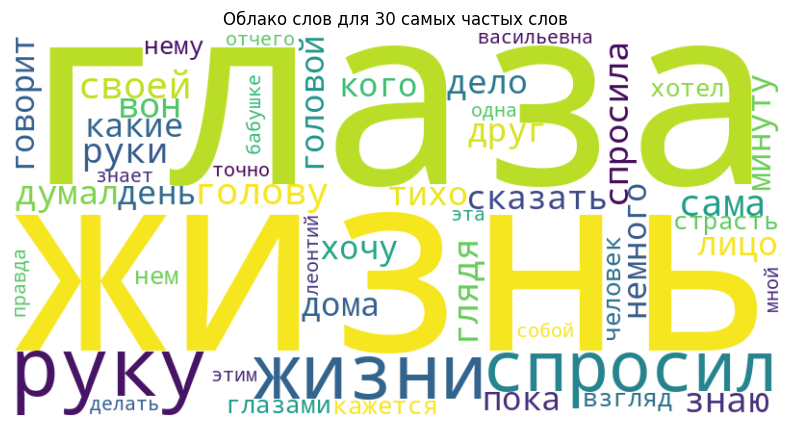

In [12]:
# Создание облака слов для 50 самых частых слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_terms.to_dict())

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для 30 самых частых слов')
plt.show()